In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df_eda = df.copy()

# Convert date_added to datetime
df_eda['date_added'] = pd.to_datetime(df_eda['date_added'], errors='coerce')

# Extract year
df_eda['year_added'] = df_eda['date_added'].dt.year


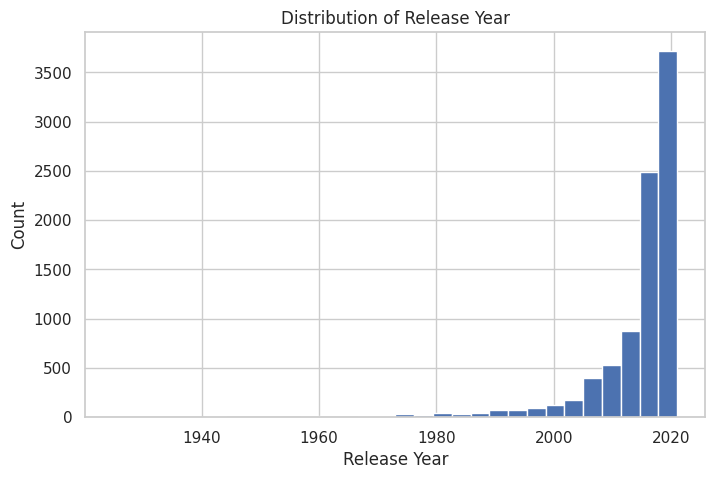

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df_eda['release_year'], bins=30)
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


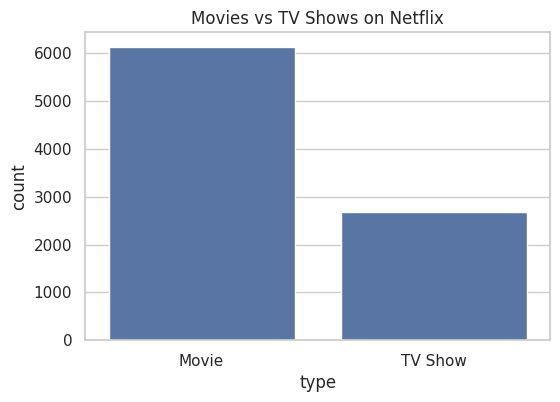

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df_eda)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


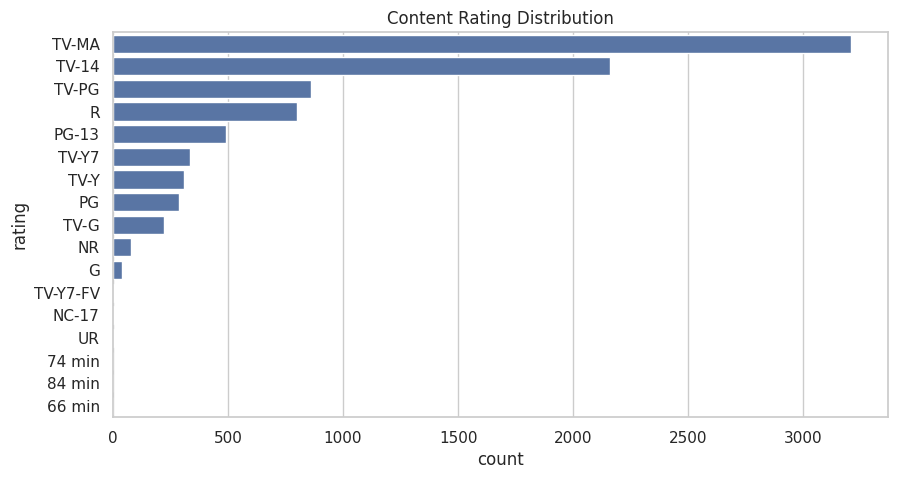

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(
    y='rating',
    data=df_eda,
    order=df_eda['rating'].value_counts().index
)
plt.title("Content Rating Distribution")
plt.show()


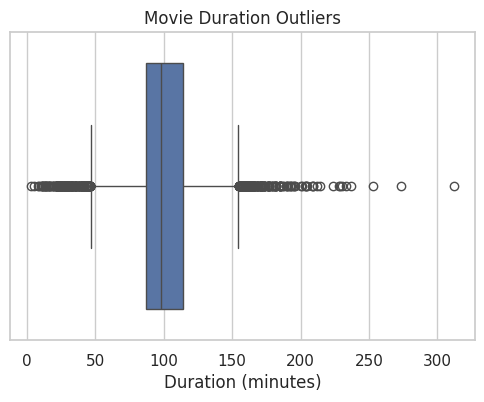

In [8]:
movies = df_eda[df_eda['type'] == 'Movie'].copy()

# Extract duration number
movies['duration_min'] = movies['duration'].str.replace(' min', '', regex=False)
movies['duration_min'] = pd.to_numeric(movies['duration_min'], errors='coerce')

plt.figure(figsize=(6,4))
sns.boxplot(x=movies['duration_min'])
plt.title("Movie Duration Outliers")
plt.xlabel("Duration (minutes)")
plt.show()


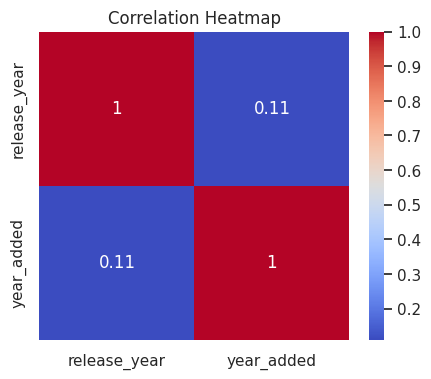

In [9]:
corr_df = df_eda[['release_year', 'year_added']].dropna()

plt.figure(figsize=(5,4))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
important_features = [
    "type",
    "rating",
    "release_year",
    "country",
    "duration",
    "listed_in"
]

important_features


['type', 'rating', 'release_year', 'country', 'duration', 'listed_in']

In [11]:
print("""
EDA SUMMARY:
- Netflix content heavily increased after 2015.
- Movies dominate over TV Shows.
- Most content is rated TV-MA and TV-14.
- Movie durations mostly range between 80–120 minutes.
- Strong relationship exists between release year and year added.
- Key predictive features identified for ML tasks.
""")



EDA SUMMARY:
- Netflix content heavily increased after 2015.
- Movies dominate over TV Shows.
- Most content is rated TV-MA and TV-14.
- Movie durations mostly range between 80–120 minutes.
- Strong relationship exists between release year and year added.
- Key predictive features identified for ML tasks.

